# Optimization with Scipy

Official documentation:
- https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
- https://docs.scipy.org/doc/scipy/reference/optimize.html

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Objective functions

### 1D sphere function

$f(x) = x^2$

In [2]:
def f1(x, *params):
    z = x**2
    return z

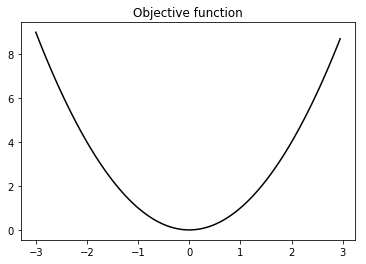

In [3]:
x = np.arange(-3., 3., 0.05)
y = f1(x)

plt.title('Objective function')
plt.plot(x, y,'k-');

### ND sphere function

$f(x) = \sum_i x_i^2$

In [4]:
def f2(x, *params):
    '''ND sphere function.
    
    $x = (x_1, x_2, ...)$
    $f(x) = \sum_i x_i^2 = x^T * x$'''
    
    z = np.dot(x, x)
    return z

## Minimize using the "Brute force" algorithm

Uses the "brute force" method, i.e. computes the function's value at each point of a multidimensional grid of points, to find the global minimum of the function.

See https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brute.html#scipy.optimize.brute

### First example: the 1D sphere function

In [5]:
from scipy import optimize

search_ranges = (slice(-3., 3., 0.1),)

res = optimize.brute(f1,
                     search_ranges,
                     #args=params,
                     full_output=True,
                     finish=optimize.fmin)

print("x* =", res[0])
print("f(x*) =", res[1])

x* = [  2.66453526e-15]
f(x*) = 7.09974814699e-30


In [6]:
print(res[2].shape)
print("tested x:", res[2])
print(res[3].shape)
print("tested f(x):", res[3])

(60,)
tested x: [ -3.00000000e+00  -2.90000000e+00  -2.80000000e+00  -2.70000000e+00
  -2.60000000e+00  -2.50000000e+00  -2.40000000e+00  -2.30000000e+00
  -2.20000000e+00  -2.10000000e+00  -2.00000000e+00  -1.90000000e+00
  -1.80000000e+00  -1.70000000e+00  -1.60000000e+00  -1.50000000e+00
  -1.40000000e+00  -1.30000000e+00  -1.20000000e+00  -1.10000000e+00
  -1.00000000e+00  -9.00000000e-01  -8.00000000e-01  -7.00000000e-01
  -6.00000000e-01  -5.00000000e-01  -4.00000000e-01  -3.00000000e-01
  -2.00000000e-01  -1.00000000e-01   2.66453526e-15   1.00000000e-01
   2.00000000e-01   3.00000000e-01   4.00000000e-01   5.00000000e-01
   6.00000000e-01   7.00000000e-01   8.00000000e-01   9.00000000e-01
   1.00000000e+00   1.10000000e+00   1.20000000e+00   1.30000000e+00
   1.40000000e+00   1.50000000e+00   1.60000000e+00   1.70000000e+00
   1.80000000e+00   1.90000000e+00   2.00000000e+00   2.10000000e+00
   2.20000000e+00   2.30000000e+00   2.40000000e+00   2.50000000e+00
   2.60000000e+00 

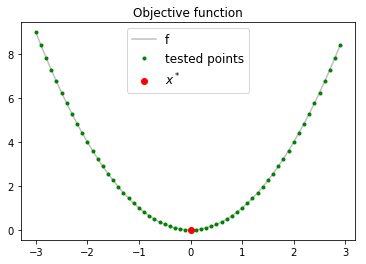

In [7]:
x_star = res[0]
y_star = res[1]

x = res[2]
y = res[3]

fig, ax = plt.subplots()

ax.set_title('Objective function')

ax.plot(x, y, 'k-', alpha=0.25, label="f")
ax.plot(x, y, 'g.', label="tested points")
ax.plot(x_star, y_star, 'ro', label="$x^*$")

ax.legend(fontsize=12);

### Second example: the 2D sphere function

In [8]:
search_ranges = (slice(-3., 3., 0.1), slice(-3., 3., 0.1))

res = optimize.brute(f2,
                     search_ranges,
                     #args=params,
                     full_output=True,
                     finish=optimize.fmin)

print("x* =", res[0])
print("f(x*) =", res[1])

x* = [ 0.  0.]
f(x*) = 0.0


In [9]:
print(res[2].shape)
print("tested x:", res[2])
print(res[3].shape)
print("tested f(x):", res[3])

(2, 60, 60)
tested x: [[[-3.  -3.  -3.  ..., -3.  -3.  -3. ]
  [-2.9 -2.9 -2.9 ..., -2.9 -2.9 -2.9]
  [-2.8 -2.8 -2.8 ..., -2.8 -2.8 -2.8]
  ..., 
  [ 2.7  2.7  2.7 ...,  2.7  2.7  2.7]
  [ 2.8  2.8  2.8 ...,  2.8  2.8  2.8]
  [ 2.9  2.9  2.9 ...,  2.9  2.9  2.9]]

 [[-3.  -2.9 -2.8 ...,  2.7  2.8  2.9]
  [-3.  -2.9 -2.8 ...,  2.7  2.8  2.9]
  [-3.  -2.9 -2.8 ...,  2.7  2.8  2.9]
  ..., 
  [-3.  -2.9 -2.8 ...,  2.7  2.8  2.9]
  [-3.  -2.9 -2.8 ...,  2.7  2.8  2.9]
  [-3.  -2.9 -2.8 ...,  2.7  2.8  2.9]]]
(60, 60)
tested f(x): [[ 18.    17.41  16.84 ...,  16.29  16.84  17.41]
 [ 17.41  16.82  16.25 ...,  15.7   16.25  16.82]
 [ 16.84  16.25  15.68 ...,  15.13  15.68  16.25]
 ..., 
 [ 16.29  15.7   15.13 ...,  14.58  15.13  15.7 ]
 [ 16.84  16.25  15.68 ...,  15.13  15.68  16.25]
 [ 17.41  16.82  16.25 ...,  15.7   16.25  16.82]]


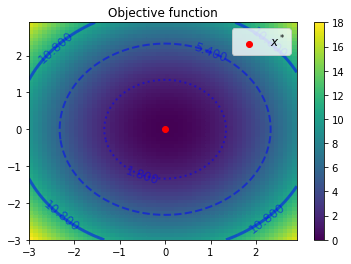

In [10]:
xx = res[2][0]
yy = res[2][1]
zz = res[3]

fig, ax = plt.subplots()

ax.set_title('Objective function')

# Plot the image #####################

#im = ax.imshow(z, interpolation='bilinear', origin='lower')
im = ax.pcolormesh(xx, yy, zz)
plt.colorbar(im)              # draw the colorbar

# Plot contours ######################

max_value = np.max(zz)
levels = np.array([0.1*max_value, 0.3*max_value, 0.6*max_value])

cs = plt.contour(xx, yy, zz, levels,
                 linewidths=(2, 2, 3), linestyles=('dotted', 'dashed', 'solid'),
                 alpha=0.5, colors='blue')
ax.clabel(cs, inline=False, fontsize=12)

# Plot x* ############################

ax.scatter(*res[0], c='red', label="$x^*$")

ax.legend(fontsize=12);